In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [2]:


df = pd.read_csv('UNSW-all.csv')
df['label'] = df.label

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'label']
y = df.loc[:, 'label'].values



In [3]:
del X['Unnamed: 0']

In [4]:
del X['id']

In [5]:
X

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,Normal
257669,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,Normal
257670,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal
257671,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal


In [6]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [8]:
categorical_feature_mask

dur                  False
proto                 True
service               True
state                 True
spkts                False
dpkts                False
sbytes               False
dbytes               False
rate                 False
sttl                 False
dttl                 False
sload                False
dload                False
sloss                False
dloss                False
sinpkt               False
dinpkt               False
sjit                 False
djit                 False
swin                 False
stcpb                False
dtcpb                False
dwin                 False
tcprtt               False
synack               False
ackdat               False
smean                False
dmean                False
trans_depth          False
response_body_len    False
ct_srv_src           False
ct_state_ttl         False
ct_dst_ltm           False
ct_src_dport_ltm     False
ct_dst_sport_ltm     False
ct_dst_src_ltm       False
is_ftp_login         False
c

In [9]:
categorical_cols

['proto', 'service', 'state', 'attack_cat']

In [11]:
df

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0.121478,tcp,-,FIN,6,4,258,172,...,1,1,0,0,0,1,1,0,Normal,0
1,1,1,0.649902,tcp,-,FIN,14,38,734,42014,...,1,2,0,0,0,1,6,0,Normal,0
2,2,2,1.623129,tcp,-,FIN,8,16,364,13186,...,1,3,0,0,0,2,6,0,Normal,0
3,3,3,1.681642,tcp,ftp,FIN,12,12,628,770,...,1,3,1,1,0,2,1,0,Normal,0
4,4,4,0.449454,tcp,-,FIN,10,6,534,268,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,257668,257668,0.000005,udp,-,INT,2,0,104,0,...,1,2,0,0,0,2,1,0,Normal,0
257669,257669,257669,1.106101,tcp,-,FIN,20,8,18062,354,...,1,1,0,0,0,3,2,0,Normal,0
257670,257670,257670,0.000000,arp,-,INT,1,0,46,0,...,1,1,0,0,0,1,1,1,Normal,0
257671,257671,257671,0.000000,arp,-,INT,1,0,46,0,...,1,1,0,0,0,1,1,1,Normal,0


In [12]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()

In [13]:
# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

X[categorical_cols].head(10)

/home/micha/anaconda3/envs/hackathon/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,proto,service,state,attack_cat
0,113,0,4,6
1,113,0,4,6
2,113,0,4,6
3,113,3,4,6
4,113,0,4,6
5,113,0,4,6
6,113,0,4,6
7,113,0,4,6
8,113,0,4,6
9,113,0,4,6


In [14]:
X

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,6
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,6
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,6
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,6
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,119,0,5,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,6
257669,1.106101,113,0,4,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,6
257670,0.000000,6,0,5,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,6
257671,0.000000,6,0,5,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,6


In [15]:
#X[categorical_cols].tail(10)

In [25]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# TODO

In [16]:
rf

NameError: name 'rf' is not defined

In [17]:
fn=X.dtypes==object
featureliste = []

In [18]:
for i in range(len(fn)):
    featureliste.append(fn.index[i])

In [19]:
featureliste

['dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat']

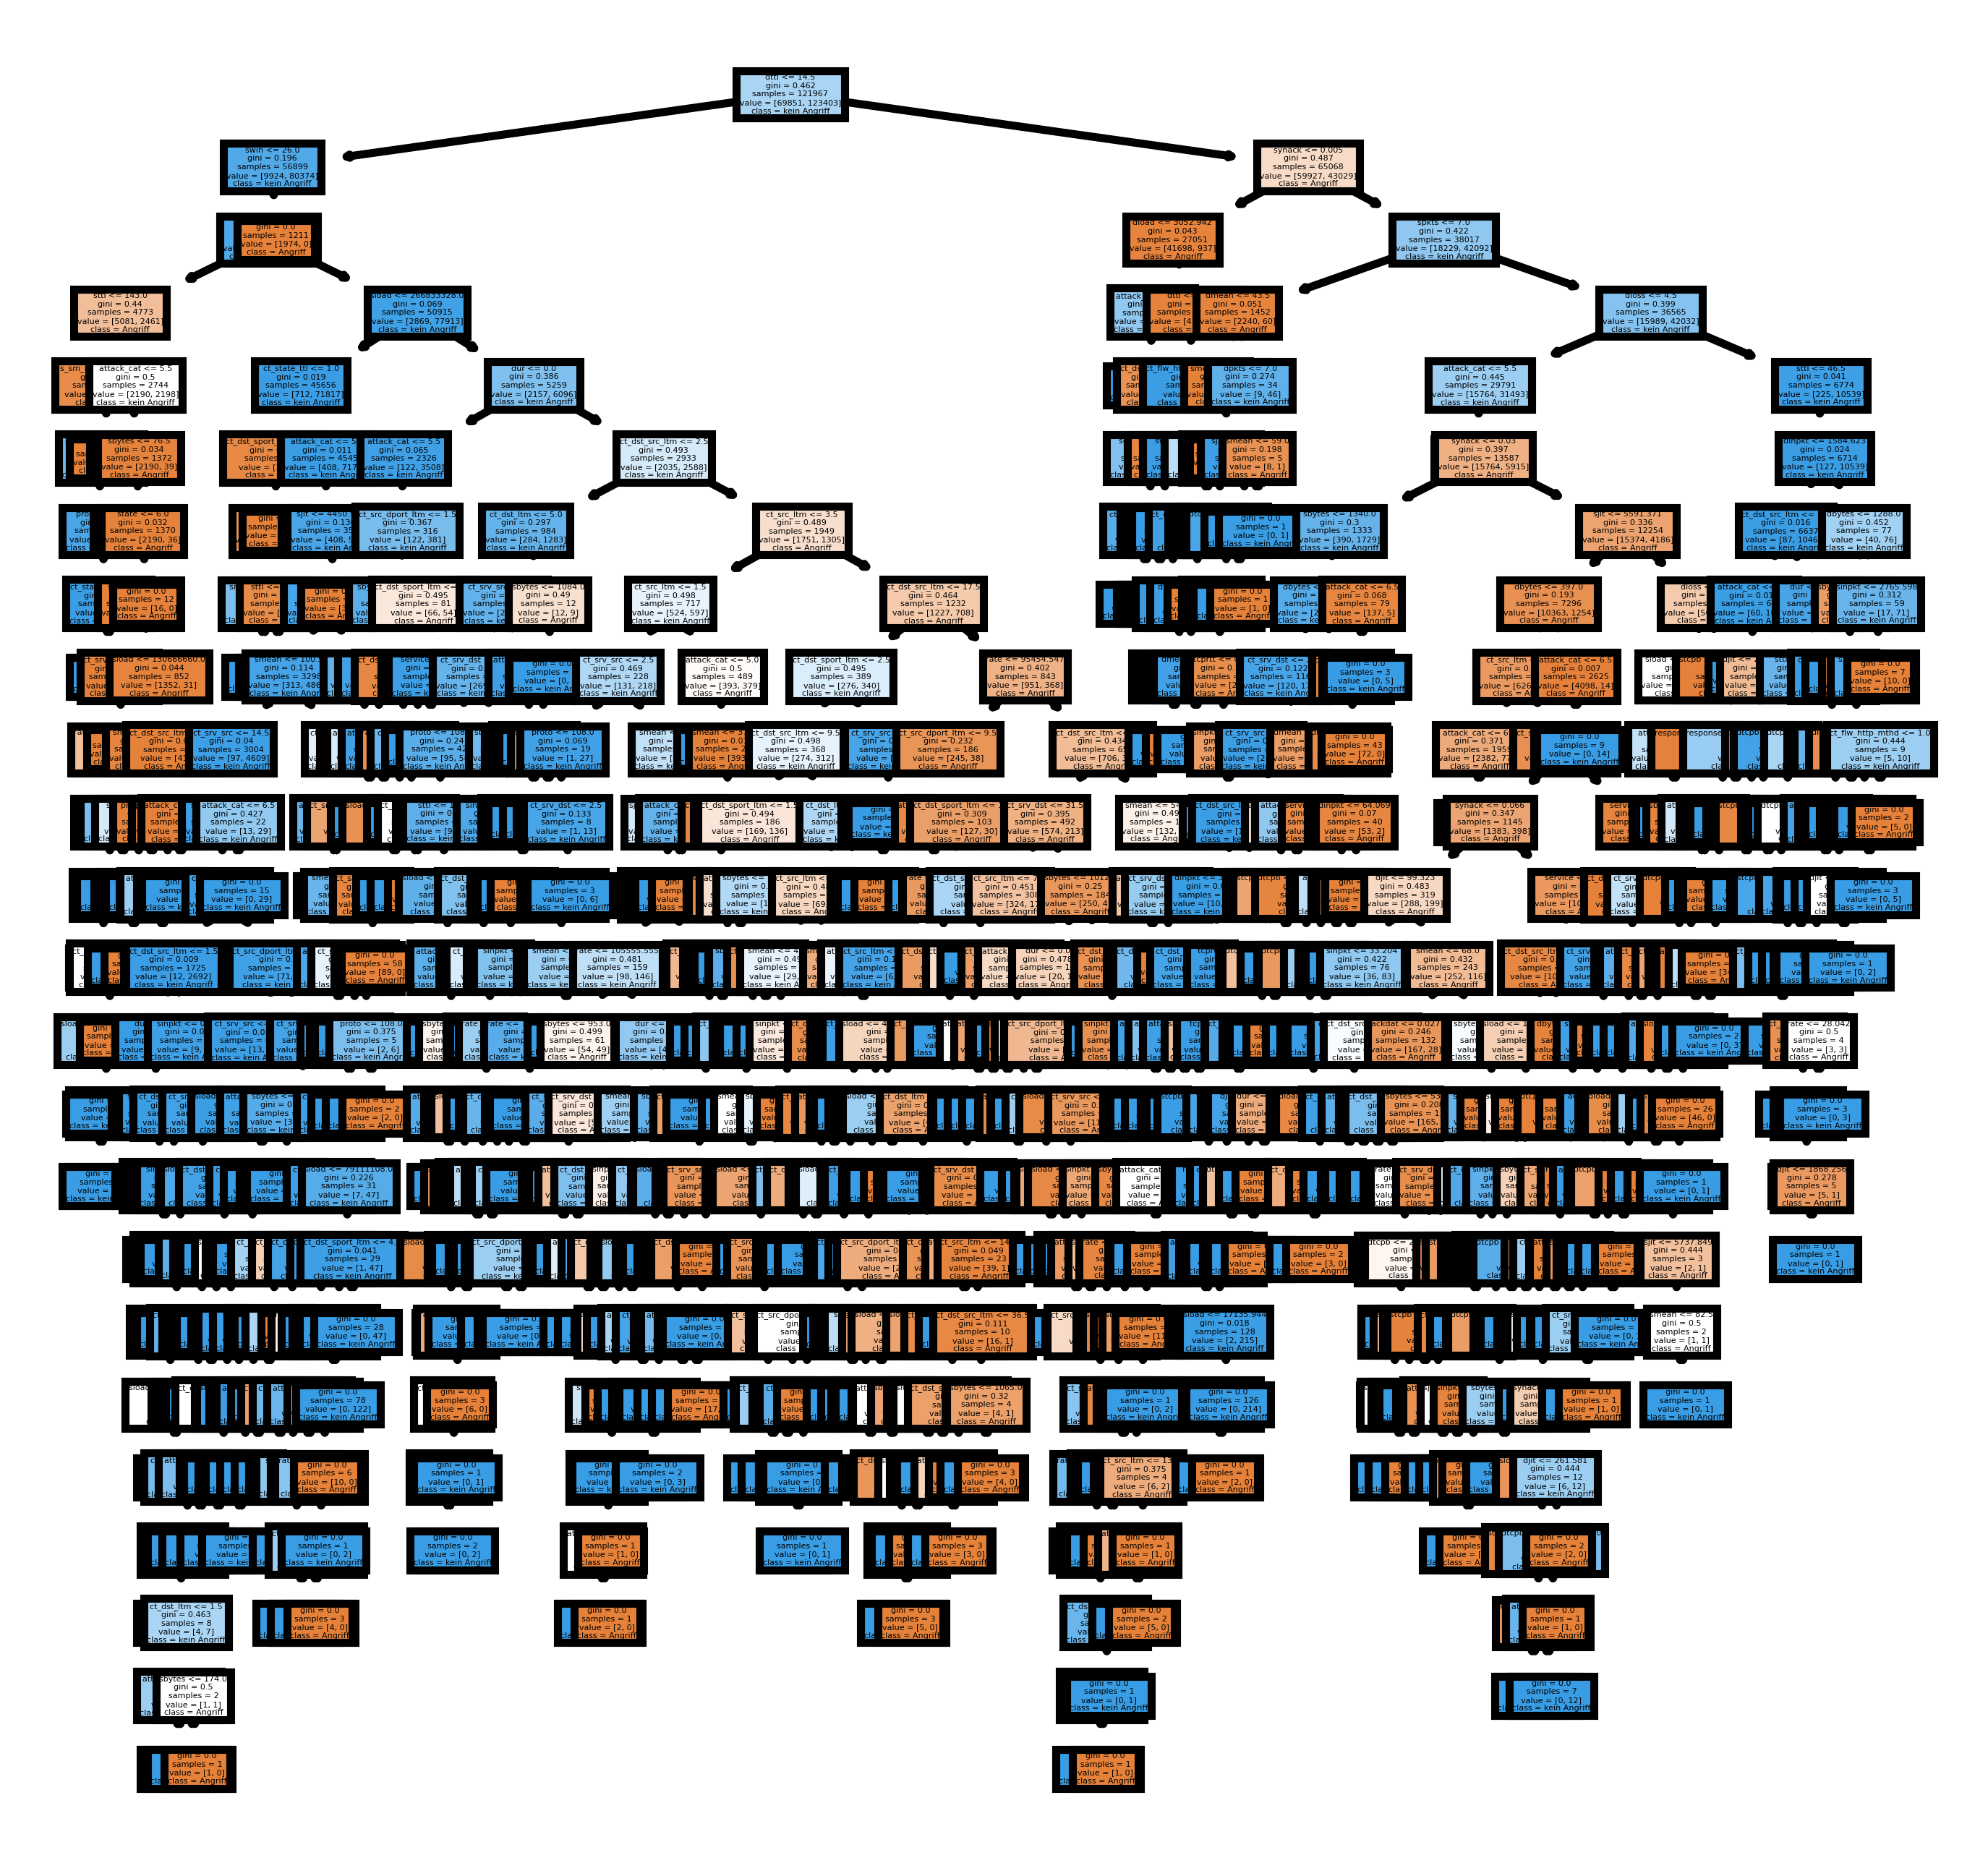

In [37]:
cn=['Angriff', 'kein Angriff']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = featureliste, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [39]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [40]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,random_state=1,criterion='entropy', max_leaf_nodes=30, max_depth=7)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=30,
                       random_state=1)

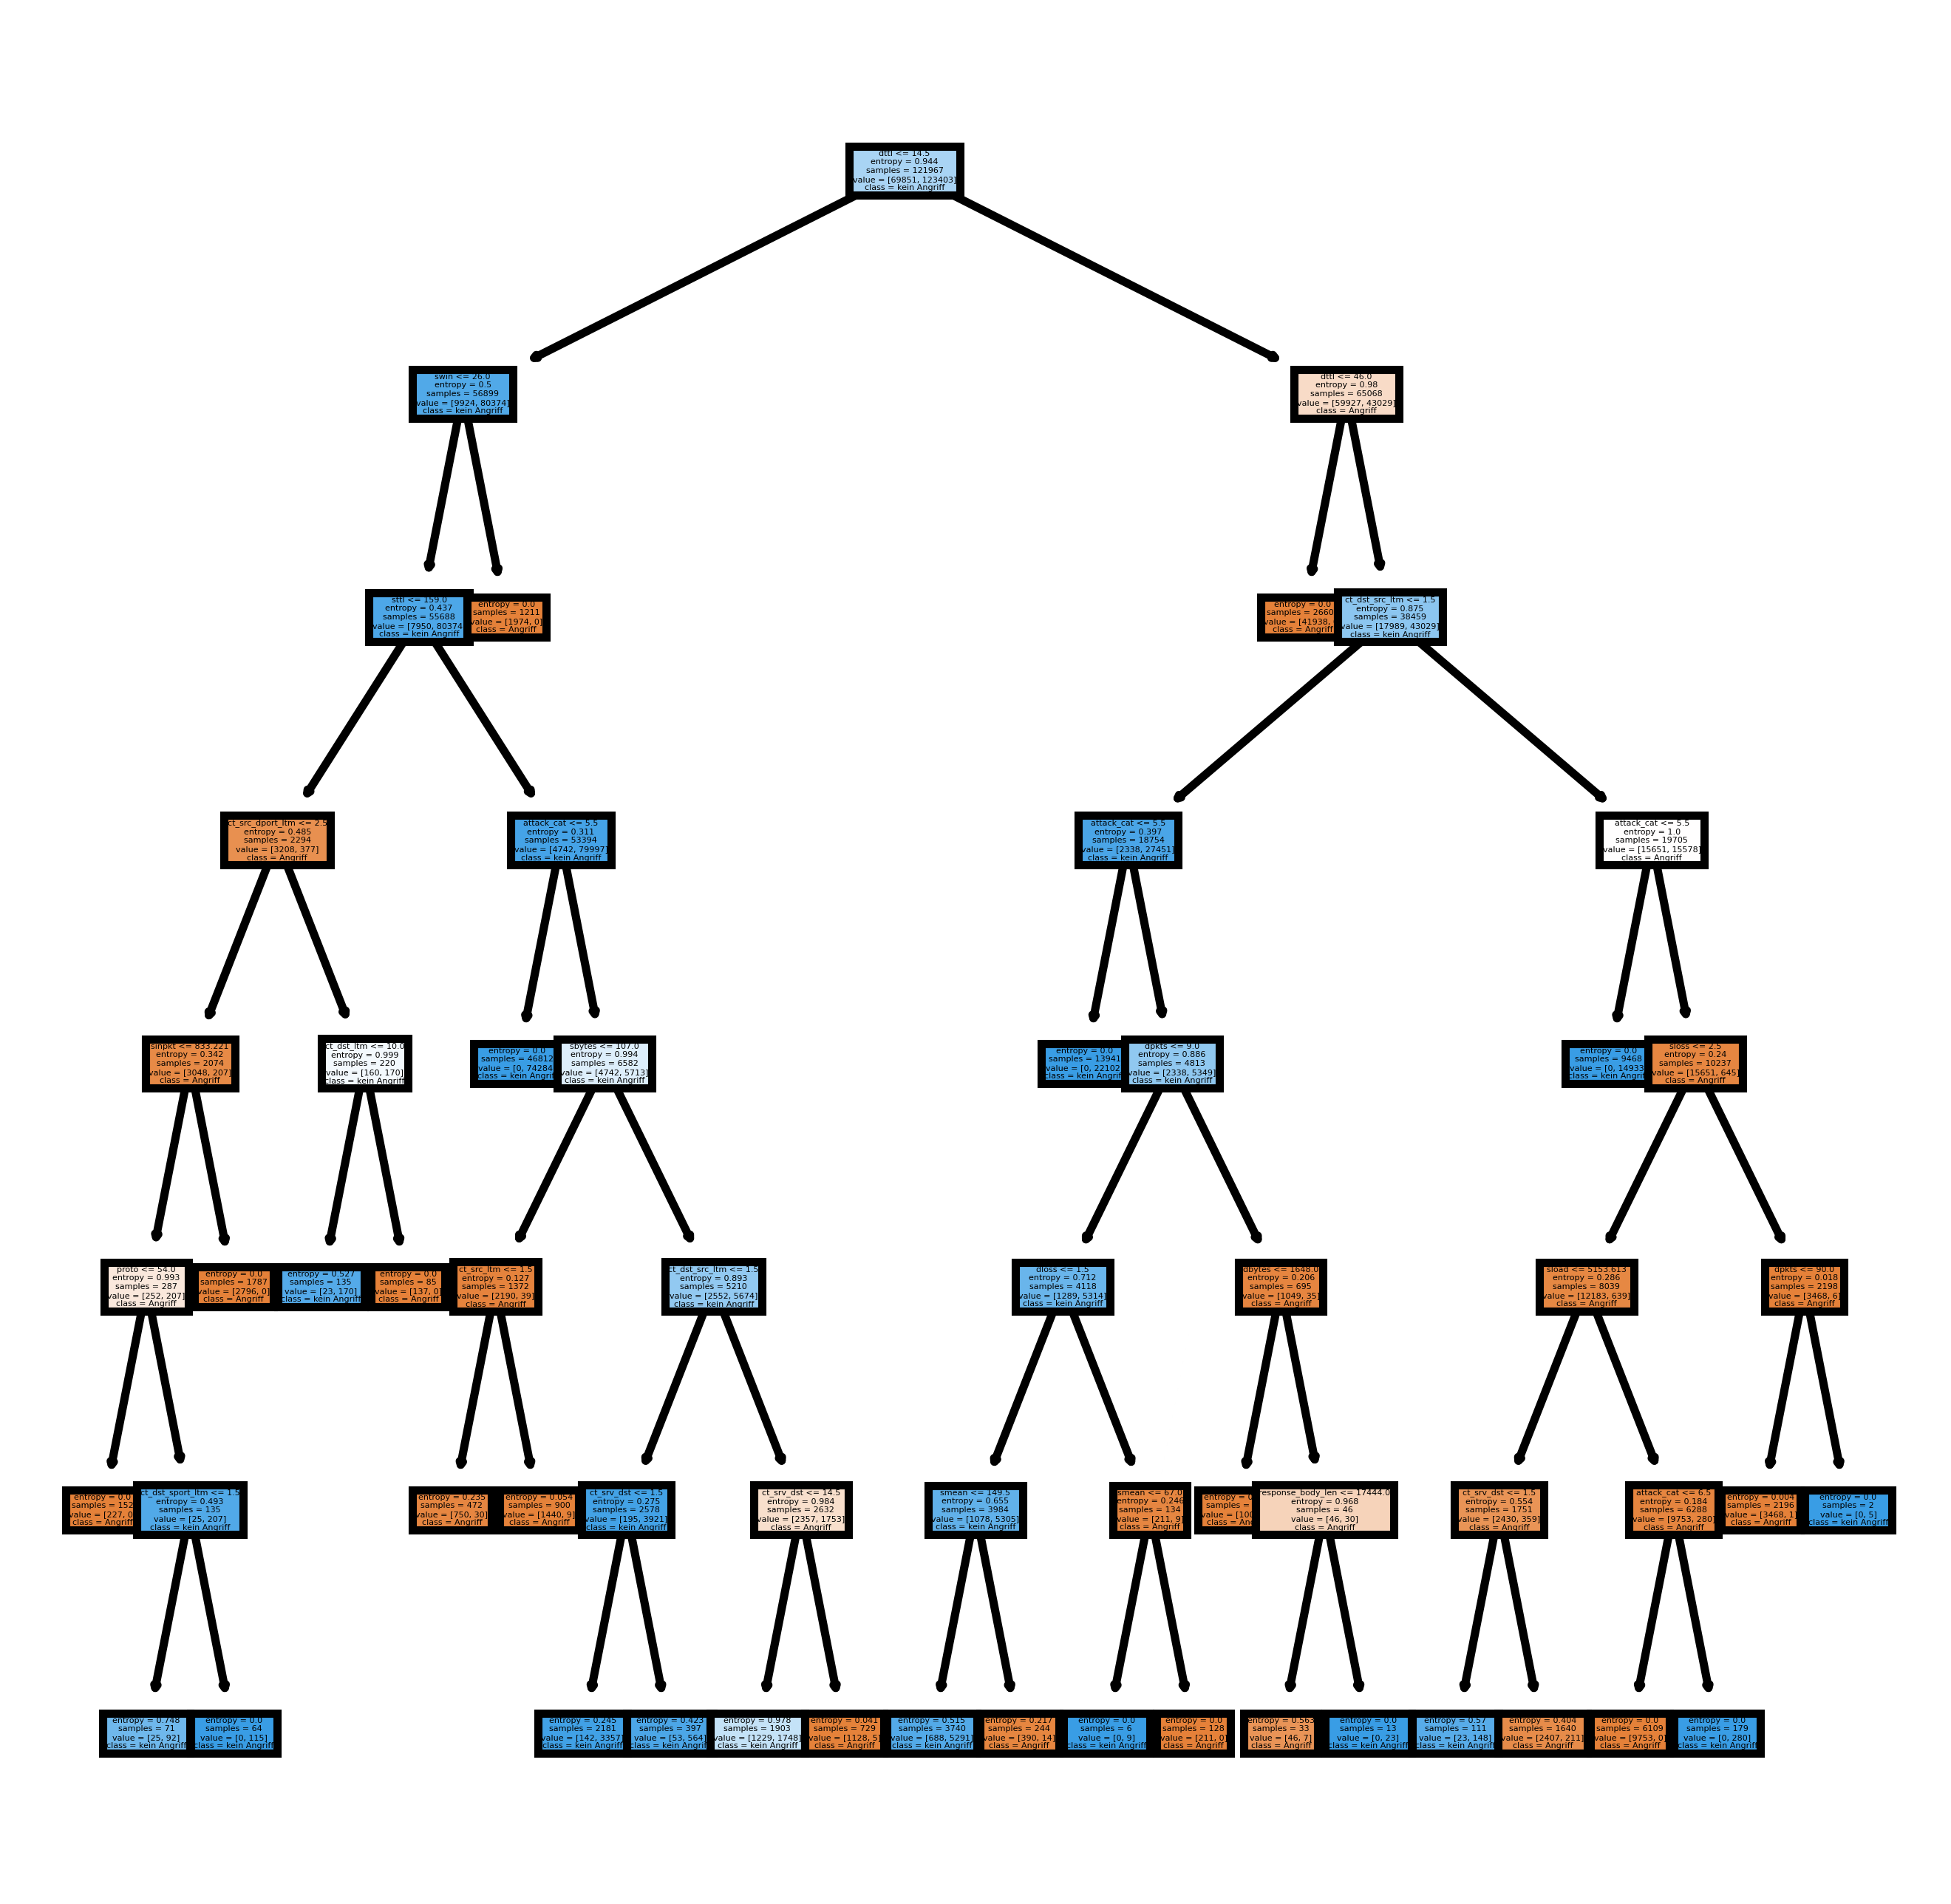

In [41]:
cn=['Angriff', 'kein Angriff']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = featureliste, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
# This may not the best way to view each estimator as it is small
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [45]:
!pip install torch

     |████████████████████████████████| 776.7 MB 2.9 kB/s  eta 0:00:01  |▏                               | 2.9 MB 3.4 MB/s eta 0:03:49     |██████████████████████████      | 628.6 MB 26.4 MB/s eta 0:00:06
  Using cached future-0.18.2.tar.gz (829 kB)
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=07747cbc3b83c98e5b09d938e42f4b3b932f4bc75a6dda74722159c370560251
  Stored in directory: /home/micha/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future


In [53]:
!pip install xgboost

     |████████████████████████████████| 148.9 MB 26.2 MB/s eta 0:00:01


In [20]:
from tpot import TPOTClassifier


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)

In [23]:
tpot = TPOTClassifier(generations=4, population_size=10, verbosity=9)
tpot.fit(X_train, Y_train)

print(tpot.score(X_test, Y_test))

tpot.export('v1-pipeline.py')

32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
Skipped pipeline #15 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f

In [ ]:
X_train.to_feather('X_train.feather')
Y_train.to_feather('Y_train.feather')
X_test.to_feather('X_test.feather')
Y_test.to_feather('Y_test.feather')